# Image Processing Lab02
---

## Setup

In [ ]:
!apt update && apt install -y ffmpeg libsm6 libxext6
!pip install opencv-python

Get:1 http://security.debian.org/debian-security buster/updates InRelease [65.4 kB]
Get:2 http://deb.debian.org/debian buster InRelease [122 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Get:4 http://security.debian.org/debian-security buster/updates/main amd64 Packages [313 kB]
Get:5 http://deb.debian.org/debian buster/main amd64 Packages [7,906 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [8,792 B]
Fetched 8,467 kB in 8s (1,018 kB/s)



5 packages can be upgraded. Run 'apt list --upgradable' to see them.



libsm6 is already the newest version (2:1.2.3-1).
libsm6 set to manually installed.
libxext6 is already the newest version (2:1.3.3-1+b2).
libxext6 set to manually installed.
The following additional packages will be installed:
  i965-va-driver intel-media-va-driver libaacs0 libaom0 libasound2
  libasound2-data libass9 libasyncns0 libavc1394-0 libavcodec58 libavdevice58
  libavfilter7 libavformat58 libavresample4 libavutil56

## Import

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## 2.1 Color Model Visualization

In [ ]:
img = cv.imread("pic2.jpg")
height, width, channels = img.shape
img = cv.resize(img, (width // 2, height //2))


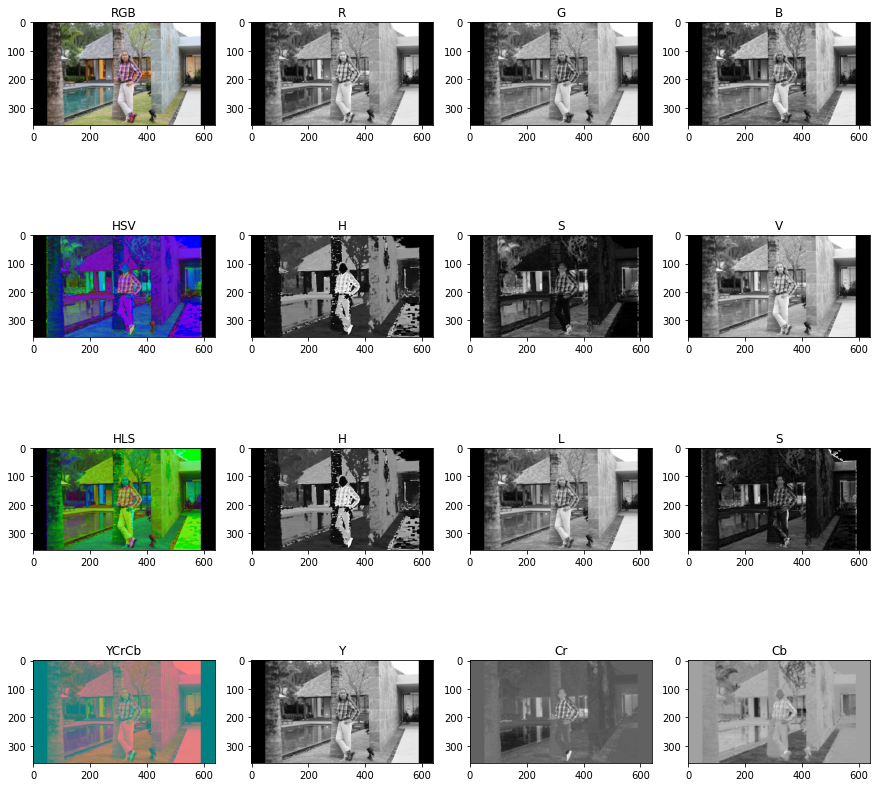

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax[0, 0].imshow(rgb_img)
ax[0, 0].set_title("RGB")

ax[0, 1].imshow(rgb_img[:, :, 0], cmap="gray")
ax[0, 1].set_title("R")

ax[0, 2].imshow(rgb_img[:, :, 1], cmap="gray")
ax[0, 2].set_title("G")

ax[0, 3].imshow(rgb_img[:, :, 2], cmap="gray")
ax[0, 3].set_title("B")

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
ax[1, 0].imshow(hsv_img)
ax[1, 0].set_title("HSV")

ax[1, 1].imshow(hsv_img[:, :, 0], cmap="gray")
ax[1, 1].set_title("H")

ax[1, 2].imshow(hsv_img[:, :, 1], cmap="gray")
ax[1, 2].set_title("S")

ax[1, 3].imshow(hsv_img[:, :, 2], cmap="gray")
ax[1, 3].set_title("V")

hls_img = cv.cvtColor(img, cv.COLOR_BGR2HLS)
ax[2, 0].imshow(hls_img)
ax[2, 0].set_title("HLS")

ax[2, 1].imshow(hls_img[:, :, 0], cmap="gray")
ax[2, 1].set_title("H")

ax[2, 2].imshow(hls_img[:, :, 1], cmap="gray")
ax[2, 2].set_title("L")

ax[2, 3].imshow(hls_img[:, :, 2], cmap="gray")
ax[2, 3].set_title("S")

ycrcb_img = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
ax[3, 0].imshow(ycrcb_img)
ax[3, 0].set_title("YCrCb")

ax[3, 1].imshow(ycrcb_img[:, :, 0], cmap="gray")
ax[3, 1].set_title("Y")

ax[3, 2].imshow(ycrcb_img[:, :, 1], cmap="gray")
ax[3, 2].set_title("Cr")

ax[3, 3].imshow(ycrcb_img[:, :, 2], cmap="gray")
ax[3, 3].set_title("Cb")

plt.show()

## 2.2 Image Addition

In [ ]:
img1 = cv.imread("pic2.jpg")
img2 = cv.imread("pic3.jpg")

weight1 = np.linspace(0, 1, num=150) # รูปแรกจาง -> รูปแรกชัด
weight2 = np.linspace(1, 0, num=150) # รูปแรกชัด -> รูปแรกจาง

w1 = np.concatenate((weight1, weight2)) # เอามาต่อกัน
w2 = 1 - w1 # ตรงข้ามกับ w1

In [ ]:
def write(filename, img1, img2, fps):
    fourcc = cv.VideoWriter_fourcc('M', 'J', 'P', 'G')
    out = cv.VideoWriter(filename, fourcc, fps, (1280, 720))

    for wa, wb in zip(w1, w2):
        add_image = (wa*img1 + wb*img2).astype(np.uint8)
        out.write(add_image)

    out.release()


In [ ]:
write("test.avi", img1, img2, 30)

## 2.3 Image Bitwise and Operation

Text(0.5, 1.0, 'Bitwise_AND() result')

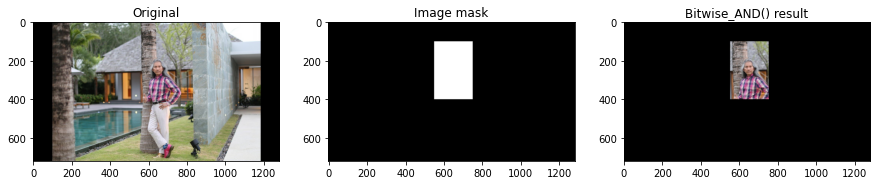

In [ ]:
img = cv.imread("pic2.jpg")
img1 = cv.imread("pic3.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
height, width, channels = img.shape
roi = img[:height, :width]


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax[0].imshow(img)
ax[0].set_title("Original")


# สร้าง mask
mask = np.zeros(shape=(height, width), dtype=np.uint8)
mask[100:400, 550:750] = 255
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Image mask")


masked_image = cv.bitwise_and(img, img, mask=mask)
ax[2].imshow(masked_image)
ax[2].set_title("Bitwise_AND() result")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b922602b-8e9b-4441-8652-7f47a552b4fc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>